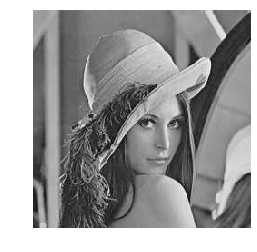

loss_fid:0.24,loss_reg:0.0015, loss_all:0.25. Trainning progress: 5.0 %:  ▋▋

KeyboardInterrupt: 

In [1]:
# 最简单的示例，使用一个三层的深度矩阵分解来拟合Lena图像
from MinPy import demo,net,reg
import torch as t
from MinPy.toolbox import dataloader,plot,pprint,io
import numpy as np

m,n,epoch = 240,240,10001 #图像的高，宽度 ，训练次数
pic = dataloader.get_data(height=n,width=n,pic_name='./train_pics/Lena.jpg') #读取灰度图像
plot.gray_im(pic) #显示灰度图像

reg = reg.auto_reg(m,'row')

dmf = demo.basic_dmf([m,m,m,n],reg) #定义模型



#训练模型
for ite in range(epoch):
    dmf.train(pic,mu=1,eta=1)
    if ite % 100==0:
        pprint.progress_bar(ite,epoch,dmf.loss_dict) # 格式化输出训练的loss，打印出训练进度条
plot.gray_im(dmf.net.data.detach().numpy()) # 显示训练的图像，可设置参数保存图像
# 训练完毕，保存模型的所有参数
io.save(dmf,'./test.pkl')
# model = io.load('./test.pkl') #后续可以通过该命令加载模型

line_dict={}
line_dict['x_plot']=np.arange(0,epoch,1)
for key in dmf.loss_dict.keys():
    line_dict[key] = np.array(dmf.loss_dict[key])

plot.lines(line_dict,save_if=True,black_if=False)
    



In [ ]:
# 最简单的示例，使用一个三层的深度矩阵分解来拟合Lena图像
from MinPy import demo
import torch as t
from MinPy.toolbox import dataloader,plot,pprint,io
import numpy as np

m,n,epoch = 240,240,10001 #图像的高，宽度 ，训练次数
pic = dataloader.get_data(height=n,width=n,pic_name='./train_pics/Lena.jpg') #读取灰度图像
plot.gray_im(pic) #显示灰度图像
transformer = data_loader.data_transform(z=pic,return_type='tensor') #变换器
mask_in = transformer.get_drop_mask(rate=0.3) #rate为丢失率，丢失矩阵
dmf = demo.basic_dmf([m,m,m,n]) #定义模型
#训练模型
for ite in range(epoch):
    dmf.train(pic,mu=1,eta=0)
    if ite % 100==0:
        pprint.progress_bar(ite,epoch,dmf.loss_dict) # 格式化输出训练的loss，打印出训练进度条
plot.gray_im(dmf.net.data.detach().numpy()) # 显示训练的图像，可设置参数保存图像
# 训练完毕，保存模型的所有参数
io.save(dmf,'./test.pkl')
# model = io.load('./test.pkl') #后续可以通过该命令加载模型

line_dict={}
line_dict['x_plot']=np.arange(0,epoch,1)
for key in dmf.loss_dict.keys():
    line_dict[key] = np.array(dmf.loss_dict[key])

plot.lines(line_dict,save_if=True,black_if=False)
    

